# Humano vs Caballo
Develop and train a **ConVnet** model to classify between two _categoris_: 
- Human
- Horse
Model should use **data augmentation** and **Keras - Tensorflow** API


## Dataset Download and Training and Validation Folders creation:
instruction **os.mkdir** creates local folder _./data/_ where zipped images are stored

In [3]:
import os
os.mkdir('./data/')
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ./data/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O ./data/validation-horse-or-human.zip


--2019-07-04 14:54:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.28.112, 2800:3f0:4005:400::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.28.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./data/horse-or-human.zip’

./data/horse-or-hum 100%[===================>] 142,65M  3,97MB/s    in 38s     

2019-07-04 14:54:42 (3,76 MB/s) - ‘./data/horse-or-human.zip’ saved [149574867/149574867]

--2019-07-04 14:54:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.28.112, 2800:3f0:4005:400::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.28.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applic

Uncompressing images and organization in **training** y **validation** folders

In [4]:
import os
import zipfile

local_zip = './data/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/trainin-horse-or-human')
local_zip = './data/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('./data/trainin-horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./data/trainin-horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('./data/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('./data/validation-horse-or-human/humans')

The number of **training** and **validation** samples in dataset is:

In [5]:
print('Files in Horse-Training', len(os.listdir(train_horse_dir)))
print('Files in Human-Training', len(os.listdir(train_human_dir)))
print('Files in Horse-Validation', len(os.listdir(validation_horse_dir)))
print('Files in Horse-Validation', len(os.listdir(validation_human_dir)))
print('Total Trainin: ', len(os.listdir(train_horse_dir))+len(os.listdir(train_human_dir)))
print('Total Validation:', len(os.listdir(validation_horse_dir))+len(os.listdir(validation_human_dir)))

Files in Horse-Training 500
Files in Human-Training 527
Files in Horse-Validation 128
Files in Horse-Validation 128
Total Trainin:  1027
Total Validation: 256


## Convolutional Neural Network in Tensorflow API
This is a two class problem of classification so it is enough to use [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)

$f(x) = \frac{1}{1+e^{-x}}$

Image will be of $300 \times 300 \times 3$

Check: https://keras.io/getting-started/sequential-model-guide/


In [3]:
import tensorflow as tf
print(tf.__version__)
model = tf.keras.Sequential([
    # First Convolution
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    # Second Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Third Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Fourth Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Flatenning to feed in a DNN
    tf.keras.layers.Flatten(),
    # Hidden layer of 512
    tf.keras.layers.Dense(512, activation='relu'),
    # Output Layer of 1 neuron. 0-> Horse, 1-> Human
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

1.13.1
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_______________________________________________________________

In [4]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

## Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255, 
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)



If the number of **epochs** to train will be $100$ what would be the size of batch?

According to: 
> **Batch size:** Set this to some number that divides your total number of images in your test set exactly from: [medium](https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

We have 1027 **training samples** for 100 steps_per_epochs, batch size would be: 

$train\_batch\_size = \frac{train\_samples}{steps\_per\_epochs}$

$train\_batch\_size = \frac{1027}{100} = 10.27$

We have 256 **validation samples** 
$validation\_batch\_size = \frac{train\_samples}{steps\_per\_epochs}$

$validation\_batch\_size = \frac{256}{100} = 10.27$

Author in Colab uses batch_size of 128 for training and 32 for validation. In that case steps_per_epochs would be: 
$\frac{1027}{128} = 8$ and $\frac{256}{32} = 8$

In [6]:
train_generator = train_datagen.flow_from_directory('./data/trainin-horse-or-human/',
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory('./data/validation-horse-or-human/',
                                                             target_size=(300,300),
                                                             batch_size=8,
                                                             class_mode='binary')




Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Training:
It must happen that:

$total-train-images=steps-per-epoch*batch-size$

$total-train-images= 8 * 128 = 1024$

$total-validation = 8*32 = 256$


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=32,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
33/33 [==============================] - 54s 2s/step - loss: 0.6411 - acc: 0.6436 - val_loss: 0.5332 - val_acc: 0.6797
Epoch 2/100
33/33 [==============================] - 63s 2s/step - loss: 0.5276 - acc: 0.7575 - val_loss: 0.3764 - val_acc: 0.8281
Epoch 3/100
33/33 [==============================] - 64s 2s/step - loss: 0.5047 - acc: 0.7692 - val_loss: 1.2367 - val_acc: 0.5703
Epoch 4/100
33/33 [==============================] - 74s 2s/step - loss: 0.4096 - acc: 0.8179 - val_loss: 1.7612 - val_acc: 0.5703
Epoch 5/100
33/33 [==============================] - 80s 2s/step - loss: 0.4216 - acc: 0.8023 - val_loss: 1.4289 - val_acc: 0.5898
Epoch 6/100
33/33 [==============================] - 76s 2s/step - loss: 0.3856 - acc: 0.8101 - val_loss: 1.7794 - val_acc: 0.5781
Epoch 7/100
33/33 [==============================] - 77s 2s/step - loss: 0.3687 - acc: 0.8315 - val_loss: 1.3498 - val_acc: 0.6602
Epoch 8/100
33/33 [================

Epoch 75/100
33/33 [==============================] - 53s 2s/step - loss: 0.0355 - acc: 0.9893 - val_loss: 3.0738 - val_acc: 0.6797
Epoch 76/100
33/33 [==============================] - 50s 2s/step - loss: 0.0474 - acc: 0.9825 - val_loss: 2.9373 - val_acc: 0.6836
Epoch 77/100
33/33 [==============================] - 52s 2s/step - loss: 0.0319 - acc: 0.9854 - val_loss: 3.4321 - val_acc: 0.6484
Epoch 78/100
33/33 [==============================] - 49s 1s/step - loss: 0.0342 - acc: 0.9893 - val_loss: 5.3244 - val_acc: 0.5664
Epoch 79/100
33/33 [==============================] - 51s 2s/step - loss: 0.0309 - acc: 0.9883 - val_loss: 3.8397 - val_acc: 0.6289
Epoch 80/100
33/33 [==============================] - 55s 2s/step - loss: 0.0377 - acc: 0.9893 - val_loss: 4.5977 - val_acc: 0.5938
Epoch 81/100
33/33 [==============================] - 50s 2s/step - loss: 0.0317 - acc: 0.9912 - val_loss: 2.8539 - val_acc: 0.6953
Epoch 82/100
33/33 [==============================] - 54s 2s/step - loss: 0.

## Plotting

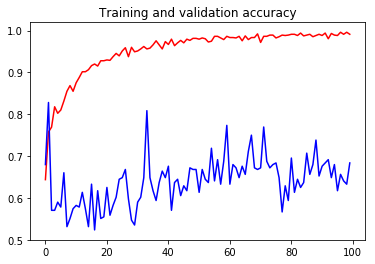

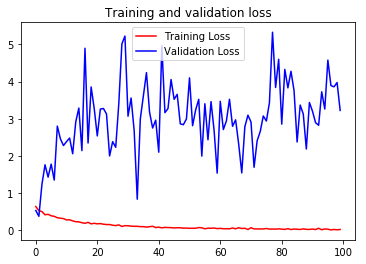

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()